In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

In [14]:
data = np.genfromtxt('bimodal_gauss1d.csv')

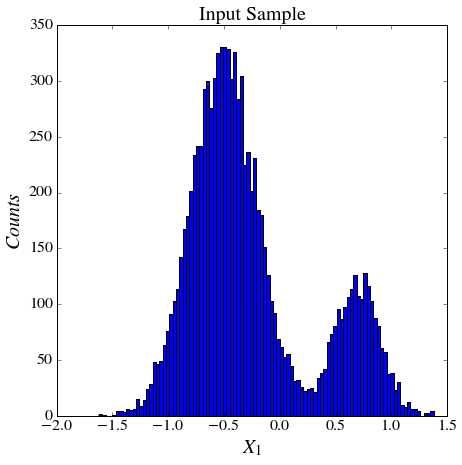

In [16]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.hist(data, 100)
ax.set_xlabel(r'$X_1$', fontsize=20)
ax.set_ylabel(r'$Counts$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_title('Input Sample', fontsize=20);

In [5]:
def plot_kde2d(kde2d_fname, ax=None, 
               vmin=None, vmax=None,
               nlevels=10, nlevels_f=50,
               linewidths=0.4,
               title=None, axis_fontsize=20, tick_labelsize=16):
    
    # read in the specialized file generated from kde_scan
    X, Y = None, None
    with open(kde2d_fname, 'r') as f:
        x = np.array(map(float, f.next().strip().split()))
        y = np.array(map(float, f.next().strip().split()))
        X, Y = np.meshgrid(x, y)
    Z = np.genfromtxt(kde2d_fname,skip_header=2)

    # plot the data    
    if ax is None: ax = plt.gca()
    csf = ax.contourf(X, Y, Z, nlevels_f,
                      vmin=vmin,vmax=vmax,
                      cmap=plt.cm.Blues)
    cs = ax.contour(X, Y, Z, nlevels,linewidths=linewidths, colors='k', linestyles='--')
    
    
    # custimize contour labels
    cbar = plt.gcf().colorbar(csf)
    cbar.ax.tick_params(labelsize=axis_fontsize) 
    ax.clabel(cs, inline=1, fmt='%1.0f', fontsize=axis_fontsize);
    
    # customize axis labels
    ax.set_xlabel(r'$X_1$', fontsize=axis_fontsize)
    ax.set_ylabel(r'$X_2$', fontsize=axis_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_labelsize)
    if title:
        ax.set_title(title, fontsize=axis_fontsize)

    return


/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


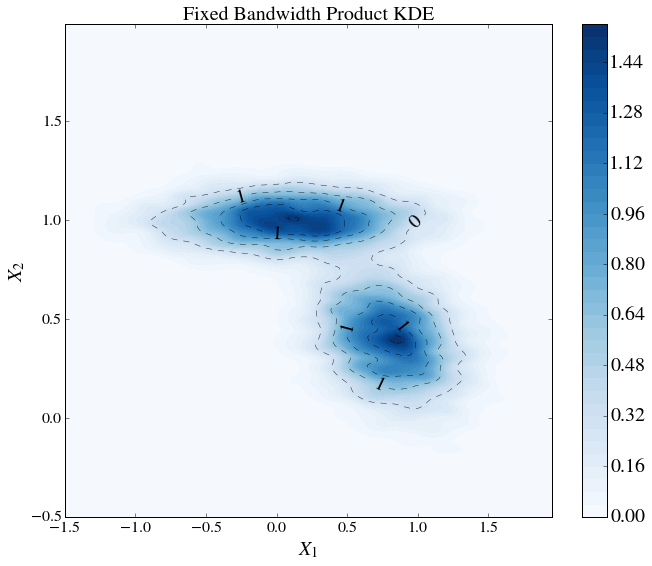

In [6]:
fig = plt.figure(figsize=(24,30))
ax = fig.add_subplot(3,2,1)
plot_kde2d('prodkde2d_scan2d.dat', ax=ax, title=r'Fixed Bandwidth Product KDE ', nlevels=5)

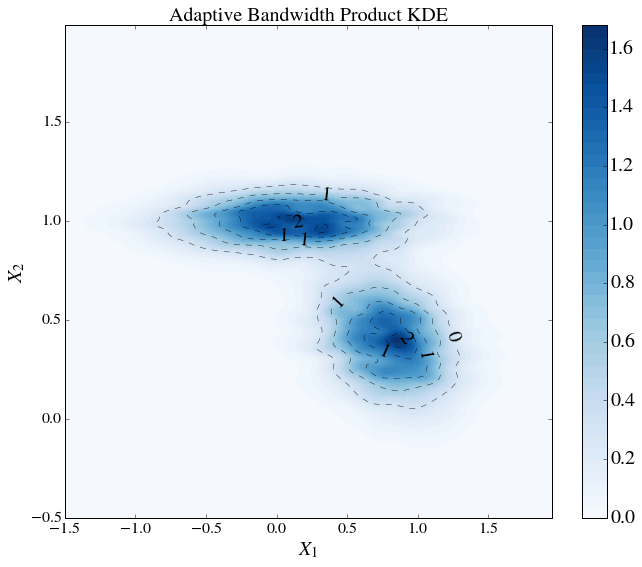

In [7]:
fig = plt.figure(figsize=(24,30))
ax = fig.add_subplot(3,2,1)
plot_kde2d('prodadakde2d_scan2d.dat', ax=ax, title=r'Adaptive Bandwidth Product KDE ', nlevels=5)

In [8]:
def plot_kde1d(kde1d_fname, ada=False,
               ax_x=None, ax_y=None,
               axis_fontsize=20, tick_labelsize=16,
               **kwargs):
    
    # require the user to provide at least 1 axes.
    if ax_x is None and ax_y is None:
        raise RuntimeError('You must provide either ax1 or ax2.')
        
    hx, hy, x, y, fx, fx_se, fy, fy_se = 0, 0, [], [], [], [], [], []
    with open(kde1d_fname, 'r') as f:
        if not ada:
            hx, hy = map(float, f.next().strip().split())
        else:
            hx, hy, ax, ay = map(float, f.next().strip().split())
        x = np.array(map(float, f.next().strip().split()))
        y = np.array(map(float, f.next().strip().split()))
        fx = np.array(map(float, f.next().strip().split()))
        if not ada:
            fx_se = np.array(map(float, f.next().strip().split()))
        fy = np.array(map(float, f.next().strip().split()))
        if not ada:
            fy_se = np.array(map(float, f.next().strip().split()))
        
    if ax_x: 
        ax_x.plot(x, fx, **kwargs)
        ax_x.set_xlabel(r'$X_1$', fontsize=axis_fontsize)
        ax_x.tick_params(axis='both', which='major', labelsize=tick_labelsize)
        
    if ax_y: 
        ax_y.plot(y, fy, **kwargs)
        ax_y.set_xlabel(r'$X_2$', fontsize=axis_fontsize)
        ax_y.tick_params(axis='both', which='major', labelsize=tick_labelsize)
        

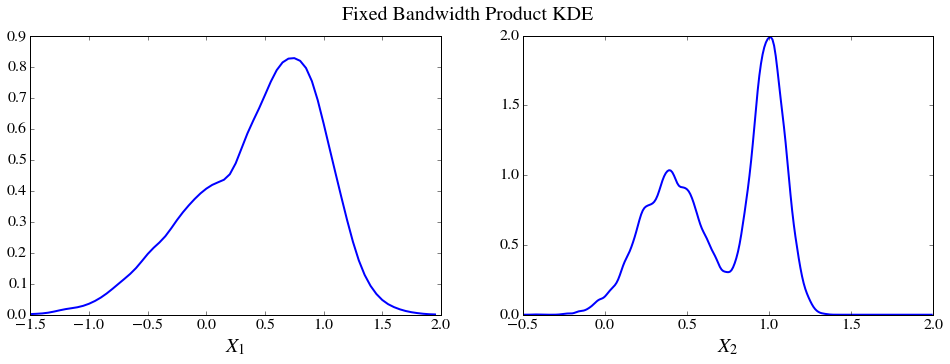

In [9]:
fig = plt.figure(figsize=(10*1.618, 5))
ax_x, ax_y = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)
plot_kde1d('prodkde2d_scan1d.dat', ax_x=ax_x, ax_y=ax_y, lw=2.0)
fig.suptitle('Fixed Bandwidth Product KDE', fontsize=20);

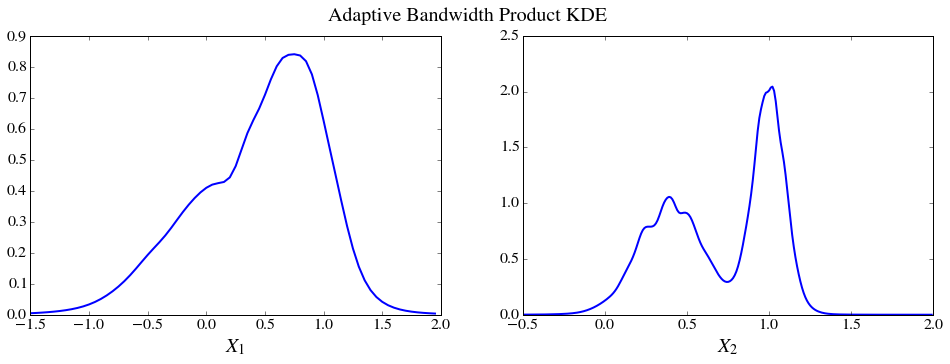

In [10]:
fig = plt.figure(figsize=(10*1.618, 5))
ax_x, ax_y = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)
plot_kde1d('prodadakde2d_scan1d.dat', ada=True, ax_x=ax_x, ax_y=ax_y, lw=2.0)
fig.suptitle('Adaptive Bandwidth Product KDE', fontsize=20);